

# Workshop 1 Basic Python Code and Simple A/B Test on Landing Page

## Introduction

The first workshop reviews the concepts of Python code syntax and gets students/participants to familiar with Jupyter Notebook settings in data analytics been used for A/B Test applications. Jupyter notebook is very common for python data scientist for mutual reference.

Jupyter notebook is an interface platform for Python high level programme language that one can insert explanations and the codes along the context as a document so that any readers can follow through the usage of the code and understand the underlying procedures. It is a requirement that student should practise insert explanations about their added codes in answering to the workshop exercise. 

The case here is borrowed from an online learning course https://www.udacity.com/course/ab-testing--ud257 which is designed to experiment on the response to the landing page of a web site.

The following libraries are imported to do the calculation (A typical Python programme makes use of other people open source codes to develop the algorithm for a particular application)


### Python libraries:

random, datetime, decimal for common language program function

pandas for data file or database manilpulation

statistics, numpy and scipy are for statistical and mathematical formula/function

In [1]:
from scipy import stats
import pandas as pd
import numpy as np
import random
import statsmodels
from decimal import *
getcontext().prec = 6

Import matplotlib.pyplot for graphics and data virualisation and "api" is other type using complied other programme for calculation 


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import statsmodels.api as sm

## Table of Contents

Part I - Explanatory Data Analysis

Part II - A/B Test

A/B tests are very commonly performed by data analysts and data scientists.

In this project I will go through the results of an A/B test run by an e-commerce website. The goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.


### Part I - Explanatory Data Analysis
First I will import the data from "ab_data.csv" using the pandas command pd.read_csv("filename") 

In [4]:
df = pd.read_csv("ab_data.csv")

<bound method NDFrame.head of         user_id                   timestamp      group landing_page  converted
0        851104  2017-01-21 22:11:48.556739    control     old_page          0
1        804228  2017-01-12 08:01:45.159739    control     old_page          0
2        661590  2017-01-11 16:55:06.154213  treatment     new_page          0
3        853541  2017-01-08 18:28:03.143765  treatment     new_page          0
4        864975  2017-01-21 01:52:26.210827    control     old_page          1
5        936923  2017-01-10 15:20:49.083499    control     old_page          0
6        679687  2017-01-19 03:26:46.940749  treatment     new_page          1
7        719014  2017-01-17 01:48:29.539573    control     old_page          0
8        817355  2017-01-04 17:58:08.979471  treatment     new_page          1
9        839785  2017-01-15 18:11:06.610965  treatment     new_page          1
10       929503  2017-01-18 05:37:11.527370  treatment     new_page          0
11       834487  2017-

In [12]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


Reading in the ab_data.csv data. This will be stored in df. 

The first few lines of the dataset will be shown. It is observed that there are 5 variables in the dataset with 2 groups identified as treatment group and control group (the non-treatment group, similar jardon used in medical experiments). The experiment design uses the treatment variable (the new landing page) to see the effect of the new landing page.  

#### Data Manupilation 

Take a step to check if there are miss alignments between control/treatment groups and landing page design. 

Sometime, there are bugs in web page program that may not perfectly be aligned with orginal experiment design.

In [5]:
new_control = len(df[(df['landing_page']=='new_page') & (df['group']=='control')])

In [6]:
new_control

1928

In [7]:
old_treatment =  len(df[(df['landing_page']=='old_page') & (df['group']=='treatment')])

In [8]:
old_treatment

1965

In [9]:
misalignment = old_treatment + new_control
misalignment

3893

It is found that there are totally 3893 cases with misalignment which is a small percentage of experiment subjects. 

Better to drop out these misalignment.

In [13]:
df = df.drop(df.index[(df['landing_page']=='new_page') & (df['group']=='control')],axis = 0)

In [14]:
df = df.drop(df.index[(df['landing_page']=='old_page') & (df['group']=='treatment')],axis = 0)

In [15]:
df.shape

(290585, 5)

The experiment ends up with 5 variables and 290585 observations

Following step is to check any missing observation amongst 5 variables 

In [16]:
# df.isna().any()
# pd.isna() is phased in some Python 3 (work in Python 2)
pd.isnull(df).any()

user_id         False
timestamp       False
group           False
landing_page    False
converted       False
dtype: bool

Perform a simple calculation to check the conversion rates of the two groups. 

Be aware of the synax output of Python 2 (recommend to run the program in Python 3) with a integer or zero by dividing one integer by another integer.

In [18]:
A = df[(df['landing_page']=='old_page') & (df['converted']==1)]
B = df[df['landing_page']=='old_page']
float(A.shape[0])/(B.shape[0])

0.1203863045004612

In [19]:
new_page_conversion = float(len(df[(df['landing_page']=='new_page') & (df['converted']==1)]))/len(df[df['landing_page']=='new_page'])

In [20]:
new_page_conversion

0.11880724790277405

A further step to check the conversion of users not the visit records that is to mean checking on if there are any duplicates.

A unique user_id identification is applied to the visit records

In [21]:
len(df.user_id.unique())

290584

It is found that there is a duplicated input. 

Create df2 to track out the record of the duplicate user, and then by command df.drop(), in case python 2 add the index as row identification, and axis as column identification, drop out one visit record to eliminate the duplication

In [22]:
df[df.duplicated('user_id') == True]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [23]:
df[df['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [24]:
df2 = df.drop(1899, axis = 0)

In [25]:
df.shape

(290585, 5)

In [26]:
df2.shape

(290584, 5)

#### Calculation of the convertion probability with receiving treatment

In [27]:
ct_rate = float(len(df2[df2['landing_page']=='new_page']))/len(df2)

In [28]:
ct_rate

0.5000619442226688

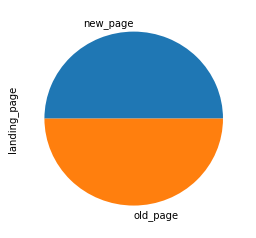

In [29]:
df2['landing_page'].value_counts().plot(kind='pie', figsize=(4,4));

In [37]:
df2['date'] = df2['timestamp'].apply(lambda x:x.split(' ')[0])
df2['time'] = df2['timestamp'].apply(lambda x:x.split(' ')[1])
df2['hour'] = df2['time'].apply(lambda x:x.split(':')[0])
df2['time'] = df2['time'].apply(lambda x:x.split('.')[0])

In [38]:
df2.head()

,user_id,timestamp,group,landing_page,converted,date,time,hour
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,2017-01-21,22:11:48,22
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,2017-01-12,08:01:45,08
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,2017-01-11,16:55:06,16
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,2017-01-08,18:28:03,18
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,2017-01-21,01:52:26,01


In [53]:
df_cr = df2.groupby(['hour'])['converted'].mean()

In [59]:
df_cr.head 
#list out conversion rate at different hours 

<bound method NDFrame.head of hour
00    0.120339
01    0.113714
02    0.113339
03    0.115007
04    0.114126
05    0.120905
06    0.121330
07    0.117589
08    0.118457
09    0.125198
10    0.117579
11    0.122810
12    0.123908
13    0.120599
14    0.118018
15    0.121179
16    0.117450
17    0.122183
18    0.126586
19    0.117099
20    0.118437
21    0.120674
22    0.119527
23    0.124401
Name: converted, dtype: float64>

## Part II A/B Testing 

Null Hypothesis: Conversion(old) >= Conversion(new)

Alternative Hypothesis: Conversion(old) < Conversion(new)

Type I error. A Type I error occurs when the researcher rejects a null hypothesis when it is true. The probability of committing a Type I error is called the significance level. This probability is also called alpha, and is often denoted by α.

Type II error. A Type II error occurs when the researcher fails to reject a null hypothesis that is false. The probability of committing a Type II error is called Beta, and is often denoted by β. The probability of not committing a Type II error is called the Power of the test.

This is a one-side test, so under the null hypothesis which the new treatment does not improve the conversion rate. In order to reject the null hypothesis, the pvalue must be greater than 95% (meaning that less than 5% by chance inducing a conversion rate of new treatment significantly higher than the conversion rate without treatment).

In [60]:
n_new = len(df2[df2['landing_page']=='new_page'])
n_old = len(df2[df2['landing_page']=='old_page'])

In [61]:
count_new = len(df2[(df2['landing_page']=='new_page') & (df2['converted']==1)])
nobs_new = len(df2[df2['landing_page']=='new_page'])
count_old = len(df2[(df2['landing_page']=='old_page') & (df2['converted']==1)])
nobs_old = len(df2[df2['landing_page']=='old_page'])

In [62]:
stat, pval = sm.stats.proportions_ztest([count_new,count_old], [nobs_new,nobs_old], alternative='larger')

In [63]:
pval
# Must be greater than .95 to reject the one-side test to conclude that greater than the conversion rate of the control sample             

0.9050583127590245

In [64]:
from statsmodels.stats.power import TTestIndPower


In [75]:
effect = 0.01
alpha = 0.05
power = 0.8
# perform power analysis
analysis = TTestIndPower()
MinsizeofSample = analysis.solve_power(effect, power=power, nobs1=None, ratio=1.0, alpha=alpha)
print('Minimum size of Sample to have a power of 80% with 5% significant level at different of 1% in conversion rate =', int(MinsizeofSample))

Minimum size of Sample to have a power of 80% with 5% significant level at different of 1% in conversion rate = 156978


### Result 

Since p-value = 0.905 << .95, the new treatment fails to reject null hypothesis, so that do not reject null hypothesis at 5% significance level. So the conversion rate of new version is not statistically significant larger than old version's conversion rate.